In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
thief = pd.read_csv("the_book_thief.csv", delimiter='|', on_bad_lines='skip')
thief.columns= ['tweet']
thief

,tweet
0,"0,""@nineeetynine @ao3org Hi! Thank you for und..."
1,;;;;
2,Amz Universal: https://t.co/TMDNDKAvkX;;;;
3,"Amz US: https://t.co/hJtDkFJkWI"";;;;"
4,"1,""@Katstodian_ @CatLebowski Jeg mener, at jeg..."
...,...
1498,The Passage - 3/5;;;;
1499,;;;;
1500,The Seven Husbands of Evelyn Hugo - 6/5;;;;
1501,;;;;


In [5]:
#nettoyage des données (utilisation de la librairie regex)
thief['tweet']= thief['tweet'].str.replace(r"[A-Za-z.][0-9]+[A-Za-z%°.]", " ")
thief['tweet']= thief['tweet'].str.replace(r"(\s-\s|-$)", " ")
thief['tweet']= thief['tweet'].str.replace(r"[,!?%()/]", " ")
thief['tweet']= thief['tweet'].str.replace(r"&\S*\s", " ")
thief['tweet']= thief['tweet'].str.replace(r"&", " ")
thief['tweet']= thief['tweet'].str.replace(r"+", " ")
thief['tweet']= thief['tweet'].str.replace(r"#", " ")
thief['tweet']= thief['tweet'].str.replace(r"$", " ")
thief['tweet']= thief['tweet'].str.replace(r"£", " ")
thief['tweet']= thief['tweet'].str.replace(r"%", " ")                                                  
thief['tweet']= thief['tweet'].str.replace(r"@", " ")
thief['tweet']= thief['tweet'].str.replace(r"-", " ")
thief['tweet']= thief['tweet'].str.replace(r";", " ")

thief

,tweet
0,"0 "" nineeetynine a rg Hi Thank you for under..."
1,
2,Amz Universal: https: t.co TMDNDKAvkX
3,"Amz US: https: t.co hJtDkFJkWI"""
4,"1 "" Katstodian_ CatLebowski Jeg mener at jeg..."
...,...
1498,The Passage 3 5
1499,
1500,The Seven Husbands of Evelyn Hugo 6 5
1501,


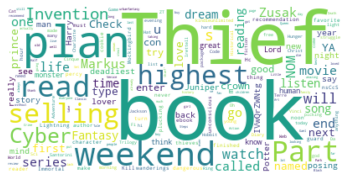

In [6]:
text = " ".join(i for i in thief['tweet'])
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors","https","t","co"])

# Generate a word cloud image
wordcloud = WordCloud(collocations = False, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
!pip install nltk

In [7]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [8]:
bigrams = get_ngrams(thief['tweet'], ngram_from=2, ngram_to=2,n=6)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_df.head()

,Bigram,Frequency
0,book thief,384
1,weekend plan,183
2,cyber thief,124
3,thief invention,124
4,invention highest,124


In [10]:
trigrams = get_ngrams(thief['tweet'], ngram_from=3, ngram_to=3, n=15)
trigrams_df = pd.DataFrame(trigrams)
trigrams_df.columns=["Trigram", "Frequency"]
trigrams_df.head()

,Trigram,Frequency
0,cyber thief invention,124
1,thief invention highest,124
2,invention highest selling,124
3,highest selling book,124
4,weekend plan watch,61


In [13]:
!pip install textblob

In [11]:
from textblob import TextBlob

# Créez un objet TextBlob à partir du texte que vous souhaitez analyser
text = thief['tweet']
blob = TextBlob(str(text))

# Utilisez la méthode `sentiment` pour obtenir un score de polarité et de subjectivité
possitif = blob.sentiment.polarity
negatif = blob.sentiment.subjectivity

print(f"Possitif: {possitif}")
print(f"Négatif: {negatif}")

Possitif: 0.0
Négatif: 0.0
